<a href="https://colab.research.google.com/github/yusam/mead2/blob/main/autos_de_infracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Carregando bibliotecas

In [296]:
## instalando feriados
#pip install holidays

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import holidays 
from google.colab import drive

### Montando drive do Google Drive

In [298]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carregando dataset


In [299]:
infracao_aux_2018 = []
infracao_aux_2019 = []
infracao_aux_2020 = []


#le todos os arquivos de 2020
for doc in glob.glob("/content/drive/MyDrive/Colab Notebooks/autos_de_infracao/2020/*"):
    infracao_aux = pd.read_csv(doc,sep=";",encoding="latin-1",low_memory=False)
    infracao_aux.columns=["tipo_infracao",
                          "descricao",
                          "tipo_infrator",
                          "tipo_veiculo",
                          "data_cometimento",
                          "hora_cometimento",
                          "local_rodovia",
                          "local_km",
                          "local_referencia",
                          "local_complemento",
                          "latitude",
                          "longitude",
                          "gravidade"]
    infracao_aux_2020.append(infracao_aux)

    
   
#le todos os arquivos de 2019
for doc in glob.glob("/content/drive/MyDrive/Colab Notebooks/autos_de_infracao/2019/*"):
    infracao_aux = pd.read_csv(doc,sep=";",encoding="latin-1",low_memory=False)
    infracao_aux.columns=["tipo_infracao",
                          "descricao",
                          "tipo_infrator",
                          "tipo_veiculo",
                          "data_cometimento",
                          "hora_cometimento",
                          "local_rodovia",
                          "local_km",
                          "local_referencia",
                          "local_complemento",
                          "latitude",
                          "longitude",
                          "gravidade"]
    infracao_aux_2019.append(infracao_aux)


#le todos os arquivos de 2018
for doc in glob.glob("/content/drive/MyDrive/Colab Notebooks/autos_de_infracao/2018/*"):
    infracao_aux = pd.read_csv(doc,sep=";",encoding="latin-1",low_memory=False)
    if infracao_aux.shape[1] == 6:
        infracao_aux.columns=["tipo_infracao",
                              "descricao",
                              "tipo_infrator",
                              "tipo_veiculo",
                              "data_cometimento",
                              "hora_cometimento",]
    else:
        infracao_aux.columns=["tipo_infracao",
                              "descricao",
                              "tipo_infrator",
                              "tipo_veiculo",
                              "data_cometimento",
                              "hora_cometimento",
                              "local_rodovia",
                              "local_km",
                              "local_referencia",
                              "local_complemento",
                              "latitude",
                              "longitude",
                              "gravidade"]
    infracao_aux_2018.append(infracao_aux)    

In [300]:
## juntando dataframes de anos difrentes
infracao1 = pd.concat(infracao_aux_2018,ignore_index = True)
infracao2 = pd.concat(infracao_aux_2019,ignore_index = True)
infracao3 = pd.concat(infracao_aux_2020,ignore_index = True)

infracao = infracao1
infracao = infracao.append(infracao2)
infracao = infracao.append(infracao3)

del infracao1, infracao2, infracao3

infracao.head().T


,0,1,2,3,4
tipo_infracao,7455-0,7455-0,6769-0,7285-0,7579-0
descricao,Transitar em velocidade superior à máxima per...,Transitar em velocidade superior à máxima per...,Conduzir veíc c/ defeito no sist de iluminaçã...,Em movimento deixar de manter a placa traseir...,Recusar-se a ser submetido a teste exame clín...
tipo_infrator,Condutor,Condutor,Proprietário,Condutor,Condutor
tipo_veiculo,AUTOMOVEL,AUTOMOVEL,Automóvel,Automóvel,Automóvel
data_cometimento,01/07/2018,01/07/2018,01/07/2018,01/07/2018,01/07/2018
hora_cometimento,00:01,00:02,00:02,00:02,00:03
local_rodovia,NaN,NaN,NaN,NaN,NaN
local_km,NaN,NaN,NaN,NaN,NaN
local_referencia,NaN,NaN,NaN,NaN,NaN
local_complemento,NaN,NaN,NaN,NaN,NaN


In [301]:
## verificando tipo de variaveis
infracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229315 entries, 0 to 899274
Data columns (total 13 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   tipo_infracao      object
 1   descricao          object
 2   tipo_infrator      object
 3   tipo_veiculo       object
 4   data_cometimento   object
 5   hora_cometimento   object
 6   local_rodovia      object
 7   local_km           object
 8   local_referencia   object
 9   local_complemento  object
 10  latitude           object
 11  longitude          object
 12  gravidade          object
dtypes: object(13)
memory usage: 238.1+ MB


In [302]:
## convertendo para data
infracao['data_cometimento'] = pd.to_datetime(infracao['data_cometimento'])
infracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229315 entries, 0 to 899274
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   tipo_infracao      object        
 1   descricao          object        
 2   tipo_infrator      object        
 3   tipo_veiculo       object        
 4   data_cometimento   datetime64[ns]
 5   hora_cometimento   object        
 6   local_rodovia      object        
 7   local_km           object        
 8   local_referencia   object        
 9   local_complemento  object        
 10  latitude           object        
 11  longitude          object        
 12  gravidade          object        
dtypes: datetime64[ns](1), object(12)
memory usage: 238.1+ MB


In [303]:
## cria coluna com fds
infracao["fim_de_semana"] = (infracao["data_cometimento"]
                             .dt.weekday
                             .apply(str)
                             .str.replace("(0|1|2|3|4)","SIM")
                             .str.replace("(5|6)","NAO")
                             )

In [304]:
## converter hora em datetime
infracao['hora'] = pd.to_datetime(infracao['hora_cometimento'].str.strip(), format='%H:%M').dt.hour
infracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229315 entries, 0 to 899274
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   tipo_infracao      object        
 1   descricao          object        
 2   tipo_infrator      object        
 3   tipo_veiculo       object        
 4   data_cometimento   datetime64[ns]
 5   hora_cometimento   object        
 6   local_rodovia      object        
 7   local_km           object        
 8   local_referencia   object        
 9   local_complemento  object        
 10  latitude           object        
 11  longitude          object        
 12  gravidade          object        
 13  fim_de_semana      object        
 14  hora               int64         
dtypes: datetime64[ns](1), int64(1), object(13)
memory usage: 272.1+ MB


In [305]:
## cria coluna com periodo do dia
def periodo(h):
    if (h>=0) and (h<6):
        return "MADRUGADA"
    elif (h>=6) and (h<12):
        return "MANHA"
    elif (h>=12) and (h<18):
        return "TARDE"
    elif (h>=18) and (h<=23):
        return "NOITE"
    
infracao["periodo_dia"] = (infracao["hora"]
                           .apply(periodo)
                           )

In [306]:
## cria coluna feriado
br_holidays = holidays.Brazil() ##(state='DF')

feriado = lambda x: br_holidays.get(x)

# def feriado(d):
#     if br_holidays.get(d) == "None":
#         return "não"
#     else:
#         return "sim"

infracao['feriado'] = infracao['data_cometimento'].apply(feriado).str.upper()

In [307]:
infracao['feriado'].value_counts()

NOSSA SENHORA APARECIDA                        9728
PROCLAMAÇÃO DA REPÚBLICA                       7391
INDEPENDÊNCIA DO BRASIL                        5788
ANO NOVO                                       5639
CORPUS CHRISTI                                 5305
FINADOS                                        5112
CARNAVAL                                       4459
SEXTA-FEIRA SANTA                              4451
QUARTA-FEIRA DE CINZAS (INÍCIO DA QUARESMA)    4220
DIA MUNDIAL DO TRABALHO                        4147
PÁSCOA                                         3307
NATAL                                          2087
PÁSCOA, TIRADENTES                             2086
TIRADENTES                                     1632
Name: feriado, dtype: int64

### Limpeza dos dados

#### Tratando valores duplicados

In [308]:
## verificando qtd de linhas e colunas
infracao.shape

(2229315, 17)

In [309]:
## verificando valores duplicados
infracao.duplicated().value_counts()

False    2154535
True       74780
dtype: int64

In [310]:
## dropando valores duplicados
infracao.drop_duplicates(inplace=True)
infracao.shape

(2154535, 17)

#### Tratando valores nulos

In [311]:
## verificando a quantidade de nulos
infracao.isna().sum().sort_values()

tipo_infracao              0
descricao                  0
tipo_infrator              0
data_cometimento           0
hora_cometimento           0
hora                       0
periodo_dia                0
fim_de_semana              0
tipo_veiculo           11706
gravidade              89251
local_rodovia          89534
local_referencia     1672585
local_km             1685672
latitude             1697725
longitude            1697725
local_complemento    2017228
feriado              2090710
dtype: int64

In [312]:
## Convertendo campos para nulos - tipo de veiculo
infracao.loc[:,"tipo_veiculo"] = (infracao.loc[:,"tipo_veiculo"]                              
                                  .str.strip() .replace("-",np.nan)
                                  .replace("null",np.nan)
                                  .replace("INEXISTENTE",np.nan)                                                        
                                  .str.upper()
                                  )

In [313]:
## verificando a quantidade de nulos
infracao.isna().sum().sort_values()

tipo_infracao              0
descricao                  0
tipo_infrator              0
data_cometimento           0
hora_cometimento           0
hora                       0
periodo_dia                0
fim_de_semana              0
tipo_veiculo           14894
gravidade              89251
local_rodovia          89534
local_referencia     1672585
local_km             1685672
latitude             1697725
longitude            1697725
local_complemento    2017228
feriado              2090710
dtype: int64

In [314]:
## dropando colunas nulas não utilizadas
infracao = infracao.drop(columns=['longitude','latitude','local_complemento','local_referencia','local_km','local_rodovia'])
infracao.isnull().sum().sort_values()

tipo_infracao             0
descricao                 0
tipo_infrator             0
data_cometimento          0
hora_cometimento          0
fim_de_semana             0
hora                      0
periodo_dia               0
tipo_veiculo          14894
gravidade             89251
feriado             2090710
dtype: int64

In [315]:
## tratando valores nulos
## utilizando a moda para os tipos de veiculos 
infracao['tipo_veiculo'].fillna(value = infracao['tipo_veiculo'].mode().to_string(), inplace=True)
infracao['feriado'].fillna(value = 'NAO FERIADO', inplace=True)
infracao.isnull().sum().sort_values()

tipo_infracao           0
descricao               0
tipo_infrator           0
tipo_veiculo            0
data_cometimento        0
hora_cometimento        0
fim_de_semana           0
hora                    0
periodo_dia             0
feriado                 0
gravidade           89251
dtype: int64

#### Normalizando dados

In [316]:
## removendo espaços do campo tipo infracao
infracao.loc[:,"tipo_infracao"] = infracao.loc[:,"tipo_infracao"].str.strip()

In [317]:
## padronizando tipo infrator
infracao.loc[:,"tipo_infrator"] = (infracao.loc[:,"tipo_infrator"]
                                   .str.strip()    
                                   .str.replace("(Proprietário|ProprietÃ¡rio)","PROPRIETARIO")
                                   .str.replace("(Pessoa Jurídica|Pessoa JurÃ\xaddica)","PESSOA_JURIDICA")
                                   .str.replace("(Pessoa Física|Pessoa FÃ\xadsica)","PESSOA_FISICA")
                                   .str.replace("Servidor Público","SERVIDOR_PUBLICO")                               
                                   .str.upper()
                                   )
infracao.tipo_infrator.value_counts()

CONDUTOR            2038019
PROPRIETARIO         116470
EMB/TRANSP               13
PESSOA_FISICA            11
SERVIDOR_PUBLICO         11
PESSOA_JURIDICA          11
Name: tipo_infrator, dtype: int64

In [318]:
## padronizando gravidade da infracao
infracao.loc[:,"gravidade"] = (infracao.loc[:,"gravidade"]
                               .str.strip()
                               .str.replace("(MÃ©dia)","MEDIA")
                               .str.replace("GravÃ\xadssima","GRAVISSIMA")                           
                               .str.upper()
                               )
infracao.gravidade.value_counts()

MEDIA         1294554
LEVE           298883
GRAVE          251225
GRAVISSIMA     220622
Name: gravidade, dtype: int64

In [319]:
## padronizando nome tipo de veiculo
infracao.loc[:,"tipo_veiculo"] = (infracao.loc[:,"tipo_veiculo"]   
                                  .str.replace("(CARRO-DE).*","CARRO_DE_MAO") 
                                  .str.replace("(AUTOM|0    AUTO).*","AUTOMOVEL")   
                                  .str.replace("(MOTOCICLET).*","MOTOCICLETA")
                                  .str.replace("(CAMINHONET).*","CAMINHONETE")
                                  .str.replace("(CAMINH)[^o|^O].[^\s]*|C[\.]","CAMINHAO")
                                  .str.replace("(\sTRATOR|\sTrator)","_TRATOR")
                                  .str.replace("(UTILI).*","UTILITARIO")
                                  .str.replace("(TRATOR).*","TRATOR_DE_RODAS")
                                  .str.replace("(.NIBU|Ã\x94).*","ONIBUS")
                                  .str.replace("(MICR|Ã\x94).*","MICROONIBUS")
                                  .str.replace("[TRIC](ICLOM).*","CICLOMOTOR")
                                  .str.replace("(SEMI|S\.)(-|)","SEMI")
                                  .str.replace("(MOTOR CASA|MOTOR-CASA)","TRAILER")
                                  .str.replace("CHASSI PLATAFORMA","CHASSI_PLATAFORMA")
                                  .str.replace("TR RODAS","TRANSP_RODAS")
                                  .str.replace("TR MISTO","TRANSP_MISTO")
                                  .str.replace("TR ESTEIRAS","TRANSP_ESTEIRAS")      
                                  )


infracao.tipo_veiculo.value_counts()

AUTOMOVEL                   1499607
CAMINHONETE                  204195
CAMIONETA                    135765
MOTOCICLETA                  107504
CAMINHAO                      72489
UTILITARIO                    70589
CAMINHAO_TRATOR_DE_RODAS      20160
SEMIREBOQUE                   17793
MICROONIBUS                    8496
ONIBUS                         7629
MOTONETA                       6602
REBOQUE                        3323
TRICICLO                        141
CICLOMOTOR                      136
TRAILER                          39
TRANSP_RODAS                     15
CHASSI_PLATAFORMA                11
SIDE-CAR                         10
TRANSP_MISTO                      8
BICICLETA                         6
CHARRETE                          5
CARRO_DE_MAO                      4
TRANSP_ESTEIRAS                   3
BONDE                             2
QUADRICICLO                       1
TRATOR_DE_RODAS                   1
                                  1
Name: tipo_veiculo, dtype: i

In [320]:
## padronizando nome tipo de veiculo agrupando a maioria em OUTROS
infracao.loc[:,"tipo_veiculo"] = (infracao.loc[:,"tipo_veiculo"]
                                  .str.strip()
                                  .str.replace("(autom|Autom|AUTOM|0    AUTO).*","AUTOMOVEL")
                                  .str.replace("(MOTOCI|Motoci).*","MOTOCICLETA")
                                  .str.replace("(Camio|CAMIO).*","AUTOMOVEL")#.str.replace("(Camio|CAMIO).*","CAMIONETA")
                                  .str.replace("(Caminho|CAMINHO).*","AUTOMOVEL")#.str.replace("(Caminho|CAMINHO).*","CAMINHONETE")
                                  .str.replace("(CAMINH|Caminh)[^o|^O].[^\s]*|C[\.]","OUTROS")#.str.replace("(CAMINH|Caminh)[^o|^O].[^\s]*|C[\.]","CAMINHAO")
                                  .str.replace("(\sTRATOR|\sTrator)","OUTROS")#.str.replace("(\sTRATOR|\sTrator)","_TRATOR")
                                  .str.replace("(UTILI|Utili).*","OUTROS")#.str.replace("(UTILI|Utili).*","UTILITARIO")
                                  .str.replace("(MOTON|Moton).*","OUTROS")#.str.replace("(MOTON|Moton).*","MOTONETA")
                                  .str.replace("(.NIBU|.nibu|Ã\x94).*","OUTROS")#.str.replace("(.NIBU|.nibu|Ã\x94).*","ONIBUS")
                                  .str.replace("(MICR|Micr|Ã\x94).*","OUTROS")#.str.replace("(MICR|Micr|Ã\x94).*","MICROONIBUS")
                                  .str.replace("(TRIC|Tric).*","OUTROS")#.str.replace("(TRIC|Tric).*","TRICICLO")
                                  .str.replace("Quadriciclo","OUTROS")#.str.replace("Quadriciclo","QUADRICICLO")
                                  .str.replace("[TRIC|Tric](iclom|ICLOM).*","OUTROS")#.str.replace("[TRIC|Tric](iclom|ICLOM).*","CICLOMOTOR")
                                  .str.replace("(Rebo|REBO).*","OUTROS")#.str.replace("(Rebo|REBO).*","REBOQUE")
                                  .str.replace("(Semi|SEMI|S\.)(-|)","OUTROS")#.str.replace("(Semi|SEMI|S\.)(-|)","SEMI")
                                  .str.replace("(TRAILER|Motor-Casa|MOTOR CASA|MOTOR-CASA)","OUTROS")#.str.replace("(Motor-Casa|MOTOR CASA|MOTOR-CASA)","TRAILER")
                                  .str.replace("(CHASSI_PLATAFORMA|Chassi Plataforma)","OUTROS")#.str.replace("Chassi Plataforma","CHASSI_PLATAFORMA")
                                  .str.replace("Charrete","OUTROS")#.str.replace("Charrete","CHARRETE")
                                  .str.replace("Bicicleta","OUTROS")#.str.replace("Bicicleta","BICICLETA")
                                  .str.replace("Bonde","OUTROS")#.str.replace("Bonde","BONDE")
                                  .str.replace("(TRANSP_RODAS|TR RODAS|Tr Rodas)","OUTROS")#.str.replace("(TR RODAS|Tr Rodas)","TRANSP_RODAS")
                                  .str.replace("Tr Misto","OUTROS")#.str.replace("Tr Misto","TRANSP_MISTO")
                                  .str.replace("(TRANSP_ESTEIRAS|Tr Esteiras)","OUTROS")#.str.replace("(TRANSP_ESTEIRAS|Tr Esteiras)","TRANSP_ESTEIRAS")
                                  .str.replace("TRATOR DE RODAS","OUTROS")#.str.replace("TRATOR DE RODAS","TRATOR")
                                  .str.replace("Carro-de-mÃ£o","OUTROS")#.str.replace("Carro-de-mÃ£o","CARRO_DE_MAO")
                                  .str.replace("SIDE-CAR","OUTROS")#.str.replace("SIDE-CAR","SIDE_CAR")                                  
                                  .str.replace("OUTROSOUTROS","OUTROS")
                                  .replace("-",np.nan)
                                  .replace("null",np.nan)
                                  .replace("INEXISTENTE",np.nan)
                                  .replace("",np.nan)
                                  )


In [321]:
## Agrupando tipo de veiculo
infracao.loc[:,"tipo_veiculo"] = (infracao.loc[:,"tipo_veiculo"]   
                                  .str.replace("(BONDE|CICLOMOTOR|TRAILER|TRANSP_RODAS|CHASSI_PLATAFORMA|TRICICLO|SIDE-CAR|TRANSP_MISTO|BICICLETA|CHARRETE|CARRO_DE_MAO)","OUTROS") 
                                  .str.replace("(CAMINHAO_TRATOR_DE_RODAS|TRANSP_ESTEIRAS|TRATOR_DE_RODAS|QUADRICICLO|MOTONETA|MICROONIBUS|ONIBUS|SEMIREBOQUE|REBOQUE)","OUTROS") 
                                  )
infracao.tipo_veiculo.value_counts()

AUTOMOVEL      1839567
OUTROS          207463
MOTOCICLETA     107504
Name: tipo_veiculo, dtype: int64

#### Tratando campo gravidade

In [322]:
infracao.gravidade.value_counts(normalize=True)

MEDIA         0.626816
LEVE          0.144718
GRAVE         0.121642
GRAVISSIMA    0.106824
Name: gravidade, dtype: float64

In [323]:
infracao.isnull().sum().sort_values()

tipo_infracao           0
descricao               0
tipo_infrator           0
data_cometimento        0
hora_cometimento        0
fim_de_semana           0
hora                    0
periodo_dia             0
feriado                 0
tipo_veiculo            1
gravidade           89251
dtype: int64

In [324]:
## tratando valores nulos
## utilizando a moda para os tipos de veiculos 
infracao['gravidade'].fillna(value = infracao['gravidade'].mode().to_string(), inplace=True)
infracao.isnull().sum().sort_values()

tipo_infracao       0
descricao           0
tipo_infrator       0
data_cometimento    0
hora_cometimento    0
gravidade           0
fim_de_semana       0
hora                0
periodo_dia         0
feriado             0
tipo_veiculo        1
dtype: int64

In [325]:
## Padronizando gravidade da infracao
infracao.loc[:,"gravidade"] = (infracao.loc[:,"gravidade"]
                               .str.strip()
                               .str.replace("(MÃ©dia|0    MEDIA)","MEDIA")
                               .str.replace("GravÃ\xadssima","GRAVISSIMA")                           
                               .str.upper()
                               )
infracao.gravidade.value_counts(normalize=True)

MEDIA         0.642275
LEVE          0.138723
GRAVE         0.116603
GRAVISSIMA    0.102399
Name: gravidade, dtype: float64

#### Tratando as infrações

In [326]:
## SEPARANDO AS INFRAÇÕES EM LEVE, MÉDIA, GRAVE E GRAVÍSSIMA ##
leve = infracao[infracao['gravidade'] == 'LEVE']
media = infracao[infracao['gravidade'] == 'MEDIA']
grave = infracao[infracao['gravidade'] == 'GRAVE']
gravissima = infracao[infracao['gravidade'] == 'GRAVISSIMA']

In [327]:
## PEGANDO OS CÓDIGOS DAS INFRAÇÕES E SUAS RESPECTIVAS GRAVIDADES ##
leve.tipo_infracao.unique()

array(['5207-0', '6912-0', '5681-0', '6483-0', '6440-0', '5622-2',
       '5444-0', '6491-0', '5622-5', '5622-3', '5622-1', '5606-0',
       '5622-4', '5983-0'], dtype=object)

In [328]:
media.tipo_infracao.unique()

array(['7455-0', '6769-0', '7285-0', '7579-0', '7463-0', '6599-2',
       '7234-0', '5045-0', '7471-0', '6637-2', '5169-1', '6726-1',
       '5010-0', '6807-0', '6610-2', '5835-0', '5118-0', '6912-0',
       '5185-2', '5908-0', '6530-0', '5720-0', '5410-0', '5738-0',
       '5843-4', '5185-1', '7633-2', '5843-3', '5207-0', '7633-1',
       '5193-0', '5711-0', '5800-0', '5967-0', '7340-0', '6637-1',
       '6408-0', '7366-1', '5991-0', '7366-2', '5061-0', '7315-0',
       '6670-0', '6700-0', '6653-1', '6270-0', '5037-1', '5878-0',
       '6823-1', '5231-1', '7358-0', '6378-0', '5029-2', '5444-0',
       '6645-0', '5428-2', '5452-6', '5819-6', '6602-0', '6173-2',
       '6858-0', '5053-1', '6866-1', '5851-2', '7625-1', '5568-0',
       '5746-3', '5509-0', '6050-1', '5690-0', '7625-2', '6980-0',
       '5274-1', '5860-0', '5827-0', '5819-7', '5851-1', '5819-4',
       '5770-3', '6122-0', '5819-5', '5681-0', '5819-3', '5460-0',
       '6068-1', '5975-0', '5797-0', '7587-0', '5550-0', '5231

In [329]:
grave.tipo_infracao.unique()

array(['5843-4', '7463-0', '5185-1', '5720-0', '5800-0', '6270-0',
       '6670-0', '5185-2', '6637-2', '6645-0', '6610-2', '6653-1',
       '6068-1', '5835-0', '6041-1', '6653-2', '5690-0', '5975-0',
       '5568-0', '7099-1', '6530-0', '6726-1', '6700-0', '6637-1',
       '6920-1', '5452-7', '5843-3', '5452-2', '5487-0', '6041-2',
       '6610-1', '5827-0', '5614-2', '5843-1', '6173-3', '5452-6',
       '6378-0', '5452-1', '6084-1', '5843-2', '6157-0', '6432-2',
       '6181-0', '6327-0', '6688-0', '5452-4', '5452-3', '7218-0',
       '5541-1', '6173-1', '6963-0', '5452-5', '6173-2', '6459-1',
       '6947-1', '5541-2', '6432-1', '6459-2', '6467-0', '6084-3',
       '6084-4', '5614-1', '5355-0', '5339-0', '6068-2', '6742-0',
       '6661-0', '6823-1', '5614-3', '6696-1', '6998-0', '6947-3',
       '5495-0', '6319-0', '7080-0', '6165-0', '5541-3', '7102-1',
       '5789-0', '6360-0', '6726-2', '6068-3', '7102-3', '5401-0',
       '6823-2', '6386-0', '6718-0', '6114-0', '6947-2', '6297

In [330]:
gravissima.tipo_infracao.unique()

array(['7471-0', '5991-0', '5908-0', '5967-0', '5045-0', '6599-2',
       '6602-0', '7587-0', '7633-1', '7633-2', '6785-1', '6122-0',
       '5770-4', '5770-3', '7064-0', '5010-0', '6130-0', '5797-0',
       '6980-0', '5134-1', '5037-1', '5819-6', '5924-1', '5169-1',
       '7579-0', '5193-0', '6050-1', '5819-7', '5274-2', '6076-0',
       '5738-0', '5274-1', '5959-4', '6025-0', '5819-3', '5819-4',
       '5428-2', '6033-0', '6050-2', '5061-0', '5118-0', '5029-2',
       '5169-2', '5770-1', '7625-2', '5819-1', '5819-2', '5819-5',
       '5096-0', '6599-1', '5770-2', '5940-1', '6556-1', '5215-2',
       '6580-0', '5142-0', '5290-0', '6017-4', '6793-0', '6050-3',
       '6564-0', '7625-1', '5029-1', '7048-1', '5258-3', '5428-1',
       '5428-3', '6017-3', '7056-1', '5037-2', '5053-1', '5886-0',
       '6807-0', '6017-1', '5126-2', '5215-1', '5282-0', '6009-2',
       '5428-4', '5088-1', '6971-0', '5312-0', '6149-0', '5053-4',
       '6556-4', '5177-0', '6556-2', '6394-3', '6017-5', '5134

In [331]:
infracao['gravidade'].value_counts()

MEDIA         1383805
LEVE           298883
GRAVE          251225
GRAVISSIMA     220622
Name: gravidade, dtype: int64

In [332]:
## CRIANDO UM DICIONÁRIO COM OS CÓDIGOS E SUAS RESPECTIVAS INFRAÇÕES ##

niveis = {'6912-0': 'LEVE', '5207-0': 'LEVE', '6491-0': 'LEVE', '5681-0': 'LEVE', '5444-0': 'LEVE', '5622-5': 'LEVE', '6483-0': 'LEVE', '6440-0': 'LEVE', '5622-1': 'LEVE', '5622-2': 'LEVE',
          '5606-0': 'LEVE', '5622-4': 'LEVE', '5622-3': 'LEVE', '5983-0': 'LEVE', '7455-0': 'MEDIA', '6769-0': 'MEDIA', '6408-0': 'MEDIA', '7366-2': 'MEDIA', '7358-0': 'MEDIA',
          '5711-0': 'MEDIA', '5231-1': 'MEDIA', '7366-1': 'MEDIA', '7234-0': 'MEDIA', '7285-0': 'MEDIA', '5878-0': 'MEDIA', '6866-1': 'MEDIA', '7340-0': 'MEDIA', '6858-0': 'MEDIA', '5479-0': 'MEDIA', 
                                '7323-2': 'MEDIA', '5746-3': 'MEDIA', '5860-0': 'MEDIA', '7315-0': 'MEDIA', '5851-2': 'MEDIA', 
                                '5851-1': 'MEDIA', '5630-0': 'MEDIA', '5509-0': 'MEDIA', '5703-0': 'MEDIA', '5746-1': 'MEDIA',
                                '7277-0': 'MEDIA', '5371-0': 'MEDIA', '5347-0': 'MEDIA', '5550-0': 'MEDIA', '6866-2': 'MEDIA',
                                '5525-0': 'MEDIA', '6548-0': 'MEDIA', '6750-0': 'MEDIA', '7331-0': 'MEDIA', '7293-0': 'MEDIA',
                                '5665-0': 'MEDIA', '7242-1': 'MEDIA', '6955-0': 'MEDIA', '6190-0': 'MEDIA', '5460-0': 'MEDIA',
                                '5410-0': 'MEDIA', '7226-1': 'MEDIA', '5223-2': 'MEDIA', '7099-2': 'MEDIA', '7242-2': 'MEDIA', 
                                '5223-1': 'MEDIA', '5762-0': 'MEDIA', '5746-2': 'MEDIA', '5894-0': 'MEDIA', '7323-3': 'MEDIA', 
                                '5231-2': 'MEDIA', '6416-0': 'MEDIA', '7226-2': 'MEDIA', '6831-3': 'MEDIA', '6831-1': 'MEDIA', 
                                '7250-0': 'MEDIA', '7056-2': 'MEDIA', '5673-1': 'MEDIA', '5380-0': 'MEDIA', '5657-0': 'MEDIA',
                                '7102-2': 'MEDIA', '6475-0': 'MEDIA', '7269-0': 'MEDIA', '7307-0': 'MEDIA', '7560-0': 'MEDIA',
          '7463-0': 'GRAVE', '6610-2': 'GRAVE', '5185-2': 'GRAVE', '5843-4': 'GRAVE', '5452-6': 'GRAVE', '5185-1': 'GRAVE',
                                '6637-2': 'GRAVE', '5568-0': 'GRAVE', '6041-2': 'GRAVE', '6726-1': 'GRAVE', '5800-0': 'GRAVE', '6530-0': 'GRAVE',
                                '6378-0': 'GRAVE', '6270-0': 'GRAVE', '6068-1': 'GRAVE', '6645-0': 'GRAVE', '6637-1': 'GRAVE', '5975-0': 'GRAVE',
                                '5614-2': 'GRAVE', '6700-0': 'GRAVE', '5843-3': 'GRAVE', '5452-7': 'GRAVE', '5690-0': 'GRAVE', '5487-0': 'GRAVE',
                                '5452-5': 'GRAVE', '6670-0': 'GRAVE', '6823-1': 'GRAVE', '6610-1': 'GRAVE', '5452-3': 'GRAVE', '6041-1': 'GRAVE',
                                '6432-2': 'GRAVE', '5614-3': 'GRAVE', '6653-2': 'GRAVE', '5835-0': 'GRAVE', '5720-0': 'GRAVE', '5827-0': 'GRAVE',
                                '5541-1': 'GRAVE', '6661-0': 'GRAVE', '5843-2': 'GRAVE', '6653-1': 'GRAVE', '7099-1': 'GRAVE', '6696-1': 'GRAVE',
                                '6084-4': 'GRAVE', '5452-1': 'GRAVE', '6432-1': 'GRAVE', '6181-0': 'GRAVE', '5843-1': 'GRAVE', '6467-0': 'GRAVE',
                                '6173-1': 'GRAVE', '5452-2': 'GRAVE', '5339-0': 'GRAVE', '6084-1': 'GRAVE', '6068-2': 'GRAVE', '6173-2': 'GRAVE',
                                '6742-0': 'GRAVE', '6688-0': 'GRAVE', '5541-2': 'GRAVE', '6920-1': 'GRAVE', '6459-2': 'GRAVE', '6947-1': 'GRAVE',
                                '6084-3': 'GRAVE', '5614-1': 'GRAVE', '5355-0': 'GRAVE', '6173-3': 'GRAVE', '6157-0': 'GRAVE', '6327-0': 'GRAVE',
                                '5452-4': 'GRAVE', '7218-0': 'GRAVE', '6963-0': 'GRAVE', '6459-1': 'GRAVE', '6947-3': 'GRAVE', '6319-0': 'GRAVE',
                                '5789-0': 'GRAVE', '5495-0': 'GRAVE', '7080-0': 'GRAVE', '6165-0': 'GRAVE', '5541-3': 'GRAVE', '7102-1': 'GRAVE',
                                '6998-0': 'GRAVE', '7102-3': 'GRAVE', '6726-2': 'GRAVE', '6068-3': 'GRAVE', '6360-0': 'GRAVE', '6823-2': 'GRAVE',
                                '6386-0': 'GRAVE', '5401-0': 'GRAVE', '6718-0': 'GRAVE', '6114-0': 'GRAVE', '6297-0': 'GRAVE', '6947-2': 'GRAVE',
          '5010-0': 'GRAVISSIMA', '7579-0': 'GRAVISSIMA', '6599-2': 'GRAVISSIMA', '5045-0': 'GRAVISSIMA', '5169-1': 'GRAVISSIMA', '7471-0': 'GRAVISSIMA',
'6076-0': 'GRAVISSIMA', '5274-1': 'GRAVISSIMA', '5029-2': 'GRAVISSIMA', '6050-1': 'GRAVISSIMA', '6050-3': 'GRAVISSIMA', '5142-0': 'GRAVISSIMA',
                                '7633-2': 'GRAVISSIMA', '5991-0': 'GRAVISSIMA', '7633-1': 'GRAVISSIMA', '5819-7': 'GRAVISSIMA', '6122-0': 'GRAVISSIMA', '7587-0': 'GRAVISSIMA',
                                '6980-0': 'GRAVISSIMA', '5118-0': 'GRAVISSIMA', '5967-0': 'GRAVISSIMA', '6050-2': 'GRAVISSIMA', '5169-2': 'GRAVISSIMA', '7625-2': 'GRAVISSIMA',
                                '5193-0': 'GRAVISSIMA', '5908-0': 'GRAVISSIMA', '5428-2': 'GRAVISSIMA', '5037-1': 'GRAVISSIMA', '7064-0': 'GRAVISSIMA', '5819-6': 'GRAVISSIMA',
                                '6580-0': 'GRAVISSIMA', '5819-3': 'GRAVISSIMA', '5819-5': 'GRAVISSIMA', '5819-4': 'GRAVISSIMA', '5134-1': 'GRAVISSIMA', '5738-0': 'GRAVISSIMA',
                                '5061-0': 'GRAVISSIMA', '5428-3': 'GRAVISSIMA', '6602-0': 'GRAVISSIMA', '5770-3': 'GRAVISSIMA', '5274-2': 'GRAVISSIMA', '5797-0': 'GRAVISSIMA',
                                '5770-4': 'GRAVISSIMA', '5819-1': 'GRAVISSIMA', '6807-0': 'GRAVISSIMA', '6033-0': 'GRAVISSIMA', '5037-2': 'GRAVISSIMA', '6130-0': 'GRAVISSIMA',
                                '5819-2': 'GRAVISSIMA', '5053-1': 'GRAVISSIMA', '6785-1': 'GRAVISSIMA', '6556-4': 'GRAVISSIMA', '7625-1': 'GRAVISSIMA', '5215-1': 'GRAVISSIMA',
                                '5177-0': 'GRAVISSIMA', '6556-2': 'GRAVISSIMA', '6556-1': 'GRAVISSIMA', '6025-0': 'GRAVISSIMA', '6599-1': 'GRAVISSIMA', '6394-3': 'GRAVISSIMA',
                                '5215-2': 'GRAVISSIMA', '6564-0': 'GRAVISSIMA', '5282-0': 'GRAVISSIMA', '5290-0': 'GRAVISSIMA', '6017-5': 'GRAVISSIMA', '5029-1': 'GRAVISSIMA',
                                '5134-2': 'GRAVISSIMA', '5770-2': 'GRAVISSIMA', '7048-1': 'GRAVISSIMA', '6017-4': 'GRAVISSIMA', '5886-0': 'GRAVISSIMA', '6793-0': 'GRAVISSIMA',
                                '7056-1': 'GRAVISSIMA', '6149-0': 'GRAVISSIMA', '5053-4': 'GRAVISSIMA', '6009-2': 'GRAVISSIMA', '5428-4': 'GRAVISSIMA', '5088-1': 'GRAVISSIMA',
                                '6971-0': 'GRAVISSIMA', '5770-1': 'GRAVISSIMA', '5428-1': 'GRAVISSIMA', '5312-0': 'GRAVISSIMA', '5924-1': 'GRAVISSIMA', '5959-4': 'GRAVISSIMA',
                                '5096-0': 'GRAVISSIMA', '5940-1': 'GRAVISSIMA', '5258-3': 'GRAVISSIMA', '6017-3': 'GRAVISSIMA', '6017-1': 'GRAVISSIMA', '5126-2': 'GRAVISSIMA',
                                '5819-8': 'GRAVISSIMA', '6785-2': 'GRAVISSIMA', '6556-5': 'GRAVISSIMA', '6262-0': 'GRAVISSIMA', '7030-1': 'GRAVISSIMA', '6939-2': 'GRAVISSIMA',
                                '6777-0': 'GRAVISSIMA', '6017-2': 'GRAVISSIMA', '5770-5': 'GRAVISSIMA', '6866-1': 'GRAVISSIMA', '6858-0': 'GRAVISSIMA', '5070-2': 'GRAVISSIMA',
                                '6009-4': 'GRAVISSIMA', '7617-1': 'GRAVISSIMA', '7030-3': 'GRAVISSIMA', '5100-1': 'GRAVISSIMA', '5304-0': 'GRAVISSIMA', '6394-1': 'GRAVISSIMA',
                                '6785-3': 'GRAVISSIMA', '5266-3': 'GRAVISSIMA', '6009-3': 'GRAVISSIMA', '6394-4': 'GRAVISSIMA', '5932-0': 'GRAVISSIMA', '5959-3': 'GRAVISSIMA',
                                '5924-2': 'GRAVISSIMA', '5916-1': 'GRAVISSIMA', '6009-1': 'GRAVISSIMA', '5240-0': 'GRAVISSIMA', '6009-5': 'GRAVISSIMA', '5088-2': 'GRAVISSIMA',
                                '5150-4': 'GRAVISSIMA'}

In [333]:
## Mapeando as gravidades para as respectivas infrações
infracao['gravidade'] = infracao['tipo_infracao'].map(niveis)

# recupera os indices das gravidades que tem nan
#xi = infracao[infracao["gravidade"].isna()].index

# mapeia as infracoes com gravidades nan e substitui na variavel gravidades com indices que tem nan
#infracao.loc[xi,"gravidade"] = infracao.loc[xi,"tipo_infracao"].map(niveis)

# substitui gravidades nan restantes por LEVE
#infracao["gravidade"].fillna(value="LEVE",inplace=True)

In [334]:
## tratando valores nulos
## utilizando a moda para os tipos de veiculos 
infracao['gravidade'].fillna(value = 'MEDIA', inplace=True)
infracao['tipo_veiculo'].fillna(value = infracao['tipo_veiculo'].mode().to_string(), inplace=True)
infracao.isnull().sum().sort_values()

tipo_infracao       0
descricao           0
tipo_infrator       0
tipo_veiculo        0
data_cometimento    0
hora_cometimento    0
gravidade           0
fim_de_semana       0
hora                0
periodo_dia         0
feriado             0
dtype: int64

In [335]:
infracao.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,data_cometimento,hora_cometimento,gravidade,fim_de_semana,hora,periodo_dia,feriado
0,7455-0,Transitar em velocidade superior à máxima per...,CONDUTOR,AUTOMOVEL,2018-01-07,00:01,MEDIA,NAO,0,MADRUGADA,NAO FERIADO
1,7455-0,Transitar em velocidade superior à máxima per...,CONDUTOR,AUTOMOVEL,2018-01-07,00:02,MEDIA,NAO,0,MADRUGADA,NAO FERIADO
2,6769-0,Conduzir veíc c/ defeito no sist de iluminaçã...,PROPRIETARIO,AUTOMOVEL,2018-01-07,00:02,MEDIA,NAO,0,MADRUGADA,NAO FERIADO
3,7285-0,Em movimento deixar de manter a placa traseir...,CONDUTOR,AUTOMOVEL,2018-01-07,00:02,MEDIA,NAO,0,MADRUGADA,NAO FERIADO
4,7579-0,Recusar-se a ser submetido a teste exame clín...,CONDUTOR,AUTOMOVEL,2018-01-07,00:03,GRAVISSIMA,NAO,0,MADRUGADA,NAO FERIADO


In [336]:
infracao['gravidade'].value_counts()

MEDIA         1337964
LEVE           303112
GRAVE          270248
GRAVISSIMA     243211
Name: gravidade, dtype: int64

### Agrupando infrações

In [337]:
infracoes_agrupadas = (
    
    infracao.
    groupby(['gravidade','tipo_veiculo','fim_de_semana','periodo_dia','feriado','tipo_infrator'],as_index=False).
    agg({'tipo_infracao':'count'})

)

## renomeando campo
infracoes_agrupadas = infracoes_agrupadas.rename(columns={'tipo_infracao':'qtd_infracoes'})

infracoes_agrupadas.head()

,gravidade,tipo_veiculo,fim_de_semana,periodo_dia,feriado,tipo_infrator,qtd_infracoes
0,GRAVE,AUTOMOVEL,NAO,MADRUGADA,FINADOS,CONDUTOR,23
1,GRAVE,AUTOMOVEL,NAO,MADRUGADA,FINADOS,PROPRIETARIO,1
2,GRAVE,AUTOMOVEL,NAO,MADRUGADA,INDEPENDÊNCIA DO BRASIL,CONDUTOR,12
3,GRAVE,AUTOMOVEL,NAO,MADRUGADA,NAO FERIADO,CONDUTOR,6938
4,GRAVE,AUTOMOVEL,NAO,MADRUGADA,NAO FERIADO,PROPRIETARIO,242


In [338]:
## criando campo log de teste
import numpy as np

infracoes_agrupadas['log_valor'] = np.log(infracoes_agrupadas['qtd_infracoes'])

infracoes_agrupadas.head()

,gravidade,tipo_veiculo,fim_de_semana,periodo_dia,feriado,tipo_infrator,qtd_infracoes,log_valor
0,GRAVE,AUTOMOVEL,NAO,MADRUGADA,FINADOS,CONDUTOR,23,3.135494
1,GRAVE,AUTOMOVEL,NAO,MADRUGADA,FINADOS,PROPRIETARIO,1,0.000000
2,GRAVE,AUTOMOVEL,NAO,MADRUGADA,INDEPENDÊNCIA DO BRASIL,CONDUTOR,12,2.484907
3,GRAVE,AUTOMOVEL,NAO,MADRUGADA,NAO FERIADO,CONDUTOR,6938,8.844769
4,GRAVE,AUTOMOVEL,NAO,MADRUGADA,NAO FERIADO,PROPRIETARIO,242,5.488938


### Tratando outliers e gerando o arquivo tratado

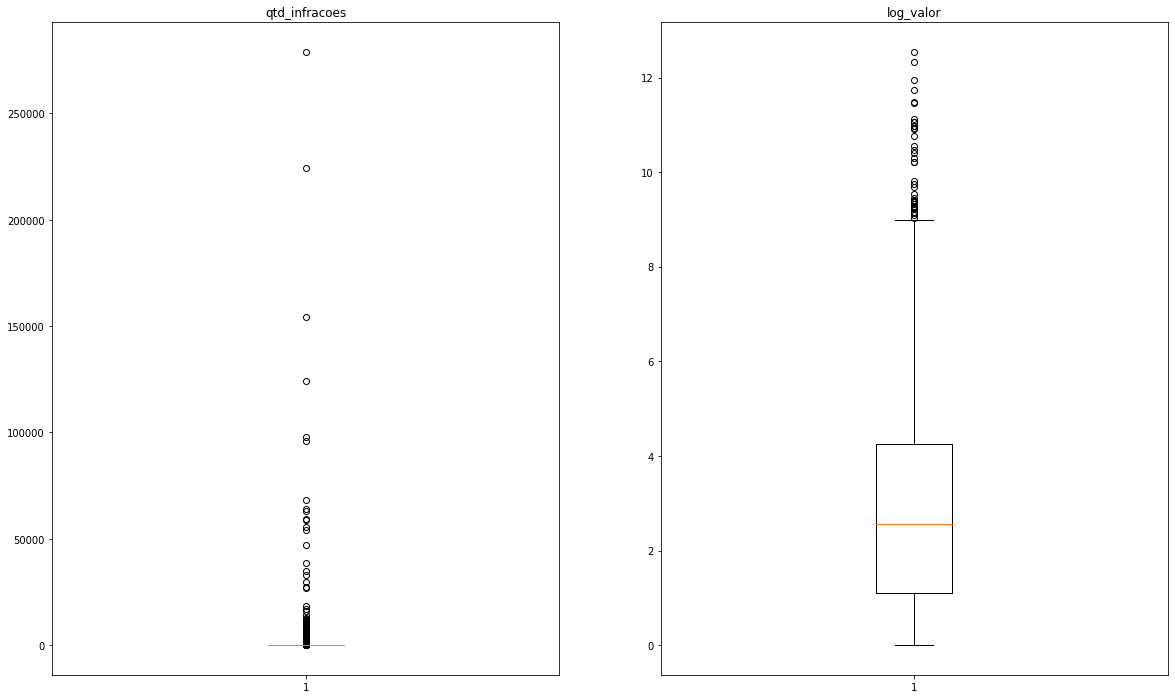

In [339]:
## Verificando outliers
f, ax = plt.subplots(1,2,figsize=(20,12))

for i,row in enumerate(infracoes_agrupadas.describe()):
    plt.subplot(1,2,i+1)
    plt.boxplot(infracoes_agrupadas[row])
    plt.title(row)
plt.show()

In [340]:
## Tratando outliers com IQR
Q1 = infracoes_agrupadas.quantile(0.25)
Q3 = infracoes_agrupadas.quantile(0.75)
IQR = Q3 - Q1

print(infracoes_agrupadas.shape)

infracoes_agrupadas = infracoes_agrupadas[~((infracoes_agrupadas < (Q1 - 1.5 * IQR)) |(infracoes_agrupadas > (Q3 + 1.5 * IQR))).any(axis=1)]

(1303, 8)


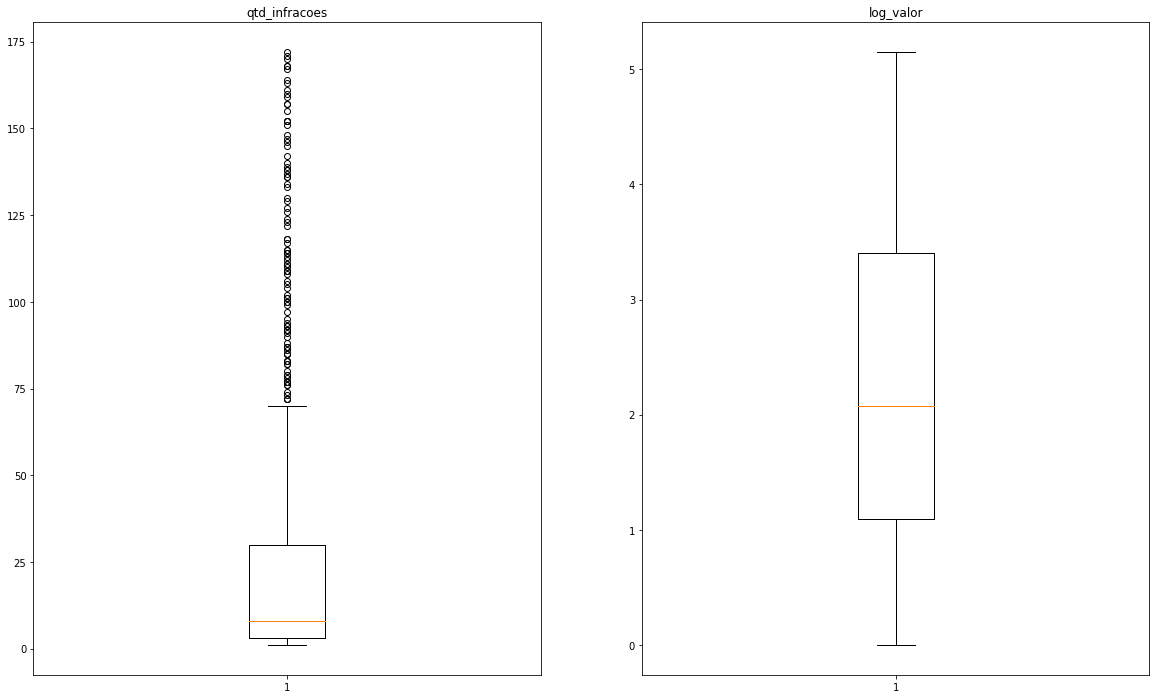

In [341]:
## Verificando outliers
f, ax = plt.subplots(1,2,figsize=(20,12))

for i,row in enumerate(infracoes_agrupadas.describe()):
    plt.subplot(1,2,i+1)
    plt.boxplot(infracoes_agrupadas[row])
    plt.title(row)
plt.show()

In [342]:
print(infracoes_agrupadas.shape)

(1081, 8)


In [343]:
## exportando resultado
infracoes_agrupadas.to_csv('/content/drive/MyDrive/Colab Notebooks/autos_de_infracao/infracoes_2018_2020_tratado.csv', sep=';',encoding="latin-1",index=False)